In [9]:
import sys
import os
import Simulations_COVID19 as SCovid19
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [10]:
'''
Load and collect data for the web,
fit the phenom models and save the info 
for the web.
'''

####### SET-UP #######

samples = 300
number_days = 200
n_steps = 25

list_countries = ['Spain','Italy'] #,'Italy','US','France','United Kingdom','Germany','Netherlands','Japan','Korea, South']

folder_html = './tables/'
folder_images = './images/'

for folder in [folder_html,folder_images]:
    if not os.path.exists(folder):
        os.makedirs(folder)
        
Dates = {'Spain':{'3/8/20':['M8','-.'],'3/14/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

####### LOAD #######

dataloader = SCovid19.data_loader()
dataloader.load_countries(flag_full_list = True)

####### TABLE ONE #######

#dataloader.date_to_html(name = 'date', folder = folder_html)
#dataloader.compile_table_to_html(name = 'memory', folder = folder_html)

####### MAPS #######

#for field in ['Confirmed','Recovered','Deaths']:
#    SCovid19.utilitis.plotly_write_html(dataloader.show_map(field = 'Deaths', exept = ['China']), name = 'map'+field+'.html', folder = folder_html) 

####### PERCENT #######
    
#plt.figure(figsize=(int(np.ceil(len(list_countries))/4*7),7))
#dataloader.plot_percents(list_countries)
#SCovid19.utilitis.plot_to_png(name = 'percents', folder = folder_images)

####### PHENOM #######

phenomsirs = SCovid19.phenom_simulator(countries = list_countries, data_table = dataloader.data)
for method in ['log-model','gompertz-model']:
    _ = phenomsirs.sample_posterior_predictive_model(method = method, field = 'Deaths', samples = samples, number_days = number_days, n_steps=n_steps)
    _ = phenomsirs.plot_results(method = method, flag_res = False, Dates = Dates)
    #SCovid19.utilitis.plot_to_png(name = method+'-curve', folder = folder_images, loc = 'upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
    #phenomsirs.traces_to_multivariateGrid(method = 'log-model')
    #SCovid19.utilitis.plot_to_png(name = method+'-multivariateGrid', folder = folder_images, loc = 'upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
    


[(0, 2000), (0.03333333333333333, 0.14285714285714285), (0.041666666666666664, 0.14285714285714285), (0.029411764705882353, 1), (0.001, 1), (0.001, 60), (0.2, 1.0), (51, 51)]
      fun: 2156.2728930839944
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.83034586e+05, -1.83844882e+03,  4.16986722e+03,  5.93151681e+03,
        1.27134172e+01,  3.73456714e+01, -1.22786332e+00,  2.58103182e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 2214
      nit: 120
   status: 0
  success: True
        x: array([2.84095869e-05, 8.44120461e-02, 4.16695656e-02, 2.94117647e-02,
       4.79612185e-01, 2.75927875e+00, 3.00294088e-01, 5.10000000e+01])

δ: Days for symptoms to appear: 11.84665041015731
1/γR: Days to recovery: 23.99833032770679
1/γD: Days to death: 34.0
μ: proportion of cases who die: 0.4796121848309868
E0: initial exposed: 2.8409586858480243e-05
β0: rate of infection: 2.759278754428846
Days before Lockdown: 51.00000001
Lockdown str

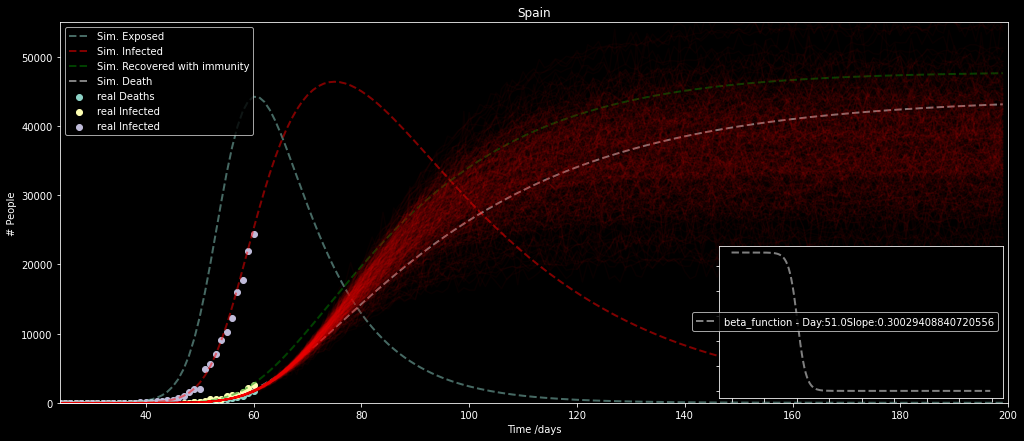

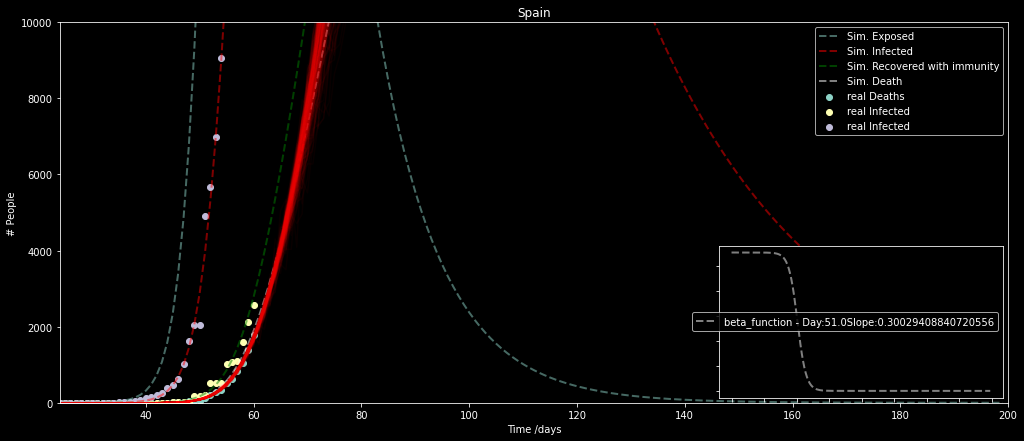

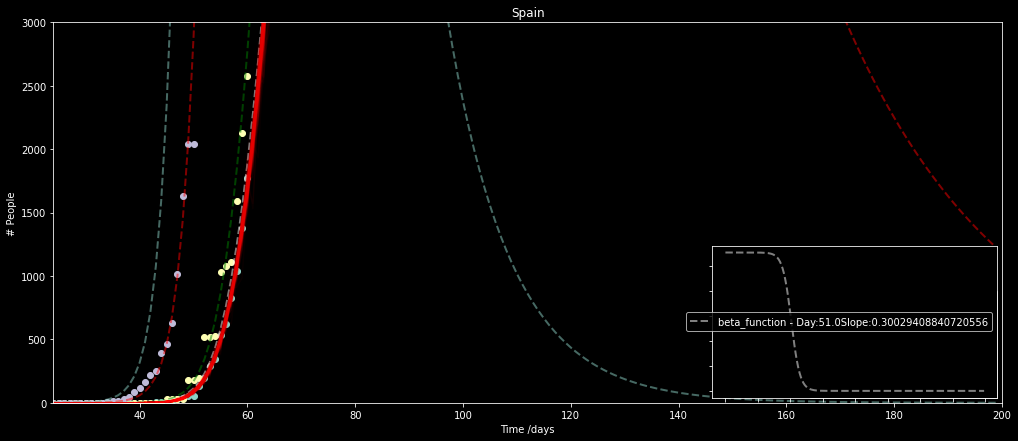

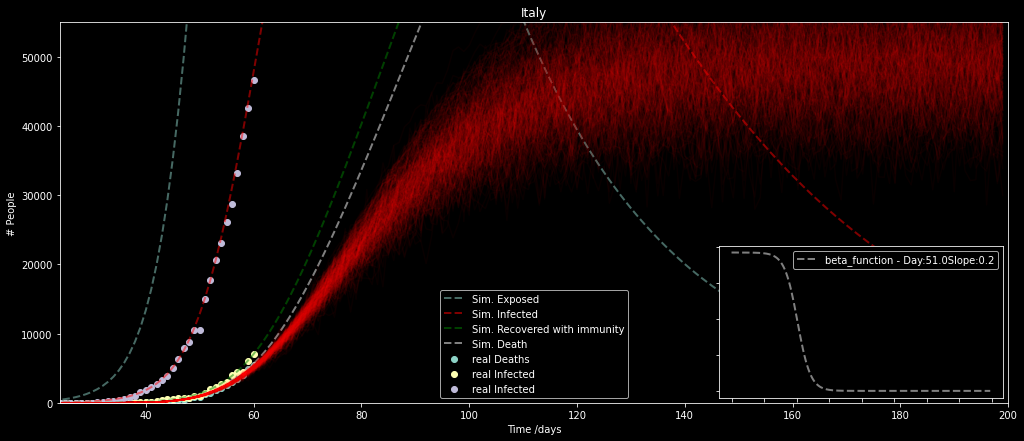

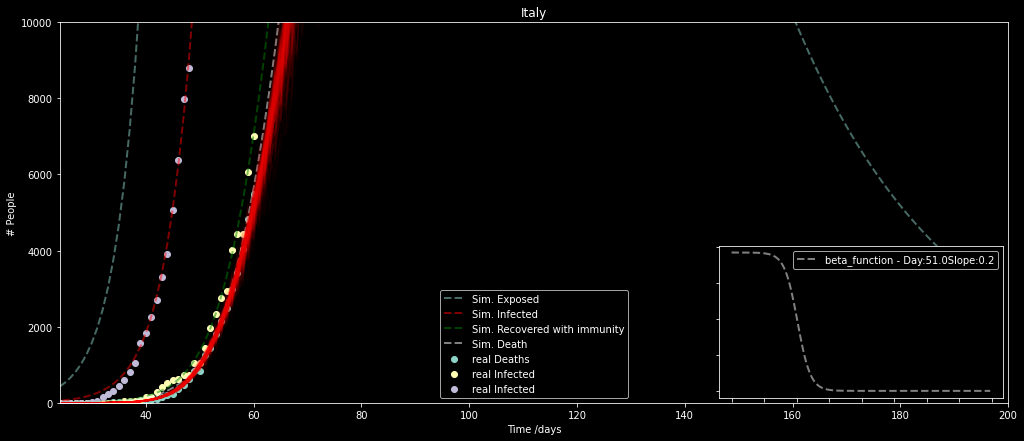

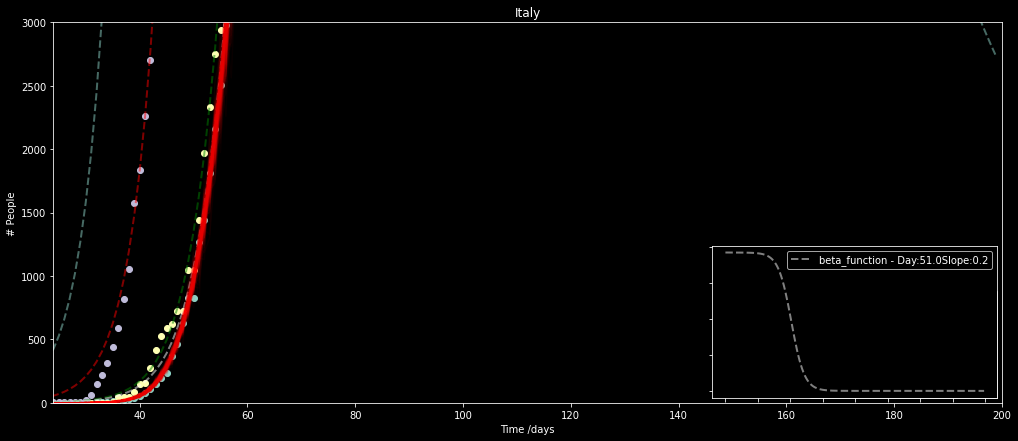

In [44]:
'''
Run beta-SIIERS exampe
'''

delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon  = 1/24, 1/24, 1/35, 0.48, 1.5, 1.0, 50.0, 0.0, 00.0


Dates = {'Spain':{'3/8/20':['M8','-.'],'3/13/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

field = 'Deaths'
method = 'gompertz-model'
country = 'Spain'
flag_res = 'False'
color = 'red'
beta_t0 = {'Spain': 51,'Italy': 47}
population = { 'Spain': 46.66  * 1000000 * 10000, 'Italy': 60.48 * 1000000}


for country in ['Spain','Italy']:
    bounds = [(0,2000),(1/30,1/7),(1/24,1/7), (1/34,1), (0.001,1), (0.001,60), (0.2, 1.0), (beta_t0[country],beta_t0[country])]
    simulator = SCovid19.siers_simulator(country, delta, gammaR, gammaD, mu, beta0, alpha, beta_t0[country], omega, epsilon, population[country], bounds)
    simulator.load_data()
    simulator.train()
    simulator.plot_results(ylim = [0,55000])
    A = simulator.ax.plot(phenomsirs.post_pred[method+'-'+field][country].T, alpha=0.04, color=color)
    simulator.plot_results(ylim = [0,10000])
    A = simulator.ax.plot(phenomsirs.post_pred[method+'-'+field][country].T, alpha=0.04, color=color)
    simulator.plot_results(ylim = [0,3000])
    A = simulator.ax.plot(phenomsirs.post_pred[method+'-'+field][country].T, alpha=0.04, color=color)


[(0, 2000), (0.03333333333333333, 0.14285714285714285), (0.041666666666666664, 0.14285714285714285), (0.029411764705882353, 1), (0.001, 1), (0.001, 60), (0.001, 1.0), (0, 10000000)]
      fun: 4028.5254698515187
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([  944.75990409,  6016.19544796, 35640.57369658, 39181.7354739 ,
       -1758.8049559 ,   502.88481361,     0.        ,     0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1683
      nit: 106
   status: 0
  success: True
        x: array([6.93833238e-04, 1.00168575e-01, 4.16666667e-02, 2.94117647e-02,
       5.75448713e-01, 1.56171547e+00, 1.00000000e+00, 1.00000000e+07])

δ: Days for symptoms to appear: 9.983170869249099
1/γR: Days to recovery: 24.0
1/γD: Days to death: 34.0
μ: proportion of cases who die: 0.5754487130464689
E0: initial exposed: 0.0006938332375571229
β0: rate of infection: 1.5617154739402683
Days before Lockdown: 10000000.00000001
Lockdown strength: 1

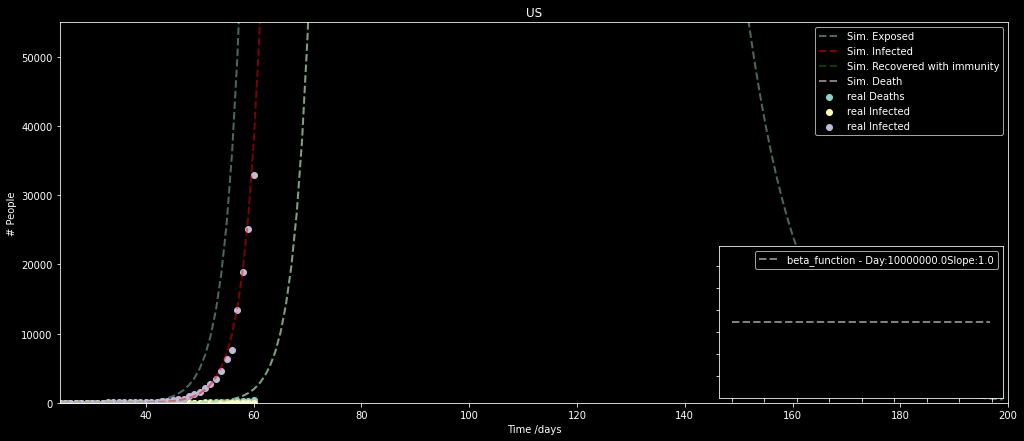

In [ ]:
'''
Run beta-SIIERS exampe
'''

delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population  = 1/24, 1/24, 1/35, 0.48, 1.5, 1.0, 5999999990.0, 0.0, 00.0, 88 * 1000000


country = 'US'

bounds = [(0,2000),(1/30,1/7),(1/24,1/7), (1/34,1), (0.001,1), (0.001,60), (0.001, 1.0), (0,10000000)]
simulator = SCovid19.siers_simulator(country, delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population, bounds)
simulator.load_data()
simulator.train()
simulator.plot_results(ylim = [0,55000])
simulator.plot_results(ylim = [0,10000])
simulator.plot_results(ylim = [0,3000])
simulator.plot_results(ylim = [0,1000])

In [12]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [16]:
field = 'Deaths'
exept = ['None']
data = dataloader.data[~dataloader.data["Country"].isin(exept)]
fig = px.choropleth(data, 
                    locations="Country", 
                    locationmode = "country names",
                    color=field, 
                    hover_name=field, 
                    animation_frame="Date",
                    color_continuous_scale="Viridis",
                    #colorbar=dict(len=0.75, title='#Cases', x=0.9, tickvals = [0, 1, 2, 3, 3.699, 4]),
                    template="plotly_dark"
                )

fig.update_layout(
    title_text = 'COVID-19',
    title_x = 0.5,
    geo=dict(
        showframe = True,
        showcoastlines = True,
    ))

fig.show()

In [17]:
px.choropleth

<function plotly.express._chart_types.choropleth(data_frame=None, lat=None, lon=None, locations=None, locationmode=None, color=None, hover_name=None, hover_data=None, custom_data=None, size=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, size_max=None, projection=None, scope=None, center=None, title=None, template=None, width=None, height=None)>

In [25]:
fig = go.Figure()

fig.add_choropleth(data, 
                    locations="Country", 
                    #locationmode = "country names",
                    color=field, 
                    hover_name=field) 
                    #animation_frame="Date",
                    #color_continuous_scale="Viridis",
                    #  autocolorscale = False)
fig.show()

ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'autocolorscale' property of choropleth
        Received value:        index Days     Date     Country Confirmed Confirmed-GR Confirmed-GF  \
0          0    0  1/22/20    Thailand         2          NaN          NaN   
1          1    1  1/23/20    Thailand         3     0.332226          NaN   
2          2    2  1/24/20    Thailand         5     0.399202     0.497512   
3          3    3  1/25/20    Thailand         7     0.285307     0.995025   
4          4    4  1/26/20    Thailand         8     0.124844       1.9802   
...      ...  ...      ...         ...       ...          ...          ...   
11158     56   56  3/18/20  The Gambia         0            0            0   
11159     57   57  3/19/20  The Gambia         0            0            0   
11160     58   58  3/20/20  The Gambia         0            0            0   
11161     59   59  3/21/20  The Gambia         0            0            0   
11162     60   60  3/22/20  The Gambia         0            0            0   

      Recovered Recovered-GR Recovered-GF Deaths Deaths-GR Deaths-GF  
0             0          NaN          NaN      0       NaN       NaN  
1             0            0          NaN      0         0       NaN  
2             0            0            0      0         0         0  
3             0            0            0      0         0         0  
4             2     0.995025            0      0         0         0  
...         ...          ...          ...    ...       ...       ...  
11158         0            0            0      0         0         0  
11159         0            0            0      0         0         0  
11160         0            0            0      0         0         0  
11161         0            0            0      0         0         0  
11162         0            0            0      0         0         0  

[11163 rows x 13 columns]

    The 'autocolorscale' property must be specified as a bool
    (either True, or False)